In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

# Verificar os dados carregados
print(customers.head())
print(orders.head())
print(order_items.head())
print(products.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cd

Pré-modelagem: Entendimento das bases

In [2]:
# Função para exibir os cabeçalhos de todas as tabelas
def display_table_headers(tables_dict):
    for table_name, df in tables_dict.items():
        print(f"\nTabela: {table_name}")
        print(df.columns.tolist())

# Carregar os dados das tabelas
tables_dict = {
    'Customers': pd.read_csv('olist_customers_dataset.csv'),
    'Orders': pd.read_csv('olist_orders_dataset.csv'),
    'Order Items': pd.read_csv('olist_order_items_dataset.csv'),
    'Products': pd.read_csv('olist_products_dataset.csv'),
    'Sellers': pd.read_csv('olist_sellers_dataset.csv'),
    'Geolocation': pd.read_csv('olist_geolocation_dataset.csv'),
    'Order Payments': pd.read_csv('olist_order_payments_dataset.csv'),
    'Order Reviews': pd.read_csv('olist_order_reviews_dataset.csv'),
    'Category Translation': pd.read_csv('product_category_name_translation.csv')
}

# Exibir os cabeçalhos
display_table_headers(tables_dict)



Tabela: Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Tabela: Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Tabela: Order Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Tabela: Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Tabela: Sellers
['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

Tabela: Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Tabela: Order Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_val

Volume de Vendas por Categoria de Produto

In [3]:
# Juntar os dados relevantes: pedidos, itens e produtos
merged_data = pd.merge(order_items, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

# Contar o número de vendas por categoria de produto
product_sales = merged_data['product_category_name'].value_counts().reset_index()
product_sales.columns = ['product_category_name', 'num_sales']

# Visualizar as 10 principais categorias de produtos
print(product_sales.head(10))


    product_category_name  num_sales
0         cama_mesa_banho      11115
1            beleza_saude       9670
2           esporte_lazer       8641
3        moveis_decoracao       8334
4  informatica_acessorios       7827
5   utilidades_domesticas       6964
6      relogios_presentes       5991
7               telefonia       4545
8      ferramentas_jardim       4347
9              automotivo       4235


Numero de clientes por Estado

In [4]:
# Unir os dados de localização e clientes
customers_geo = pd.merge(customers, geolocation, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Contagem de clientes por estado
state_sales = customers_geo['geolocation_state'].value_counts().reset_index()
state_sales.columns = ['state', 'num_customers']

# Visualizar os estados com o maior número de clientes
print(state_sales.head())



  state  num_customers
0    SP        5620430
1    RJ        3015690
2    MG        2878728
3    RS         805370
4    PR         626021


  state  num_customers
0    SP        5620430
1    RJ        3015690
2    MG        2878728
3    RS         805370
4    PR         626021


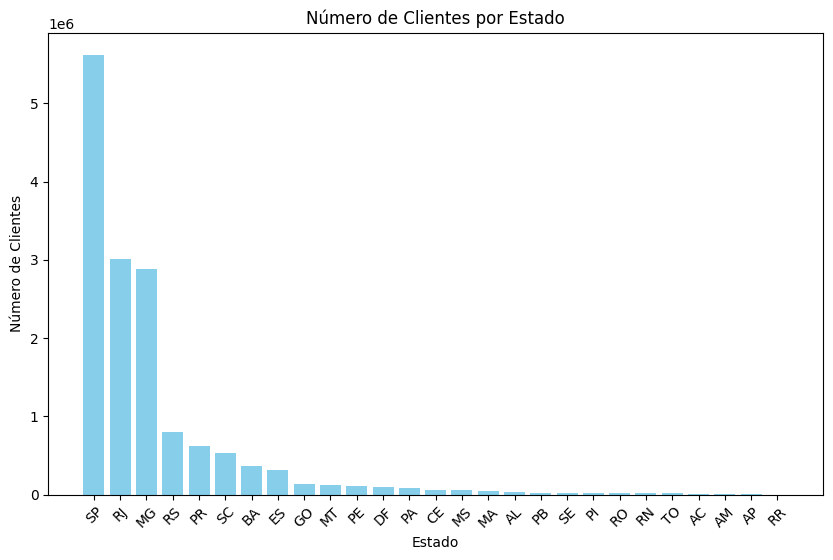

In [5]:
# Contagem de clientes por estado (já calculado anteriormente)
state_sales = customers_geo['geolocation_state'].value_counts().reset_index()
state_sales.columns = ['state', 'num_customers']

# Visualizar os estados com o maior número de clientes
print(state_sales.head())

# Gráfico de barras para visualização
plt.figure(figsize=(10, 6))
plt.bar(state_sales['state'], state_sales['num_customers'], color='skyblue')
plt.title('Número de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_17.png', format='png')
plt.show()


In [6]:
import dask.dataframe as dd

# Carregar os dados com Dask
customers = dd.read_csv('olist_customers_dataset.csv')
orders = dd.read_csv('olist_orders_dataset.csv')
order_items = dd.read_csv('olist_order_items_dataset.csv')
geolocation = dd.read_csv('olist_geolocation_dataset.csv')

# Fazer o merge com Dask
customers_geo = dd.merge(customers, geolocation, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
orders_geo = dd.merge(orders, customers_geo, on='customer_id')
orders_items_geo = dd.merge(order_items, orders_geo, on='order_id')

# Agrupar e calcular vendas por estado
sales_by_state = orders_items_geo.groupby('geolocation_state')['price'].sum().compute()

# Visualizar os resultados
print(sales_by_state.head())




geolocation_state
AC     1494037.73
AL     7191886.10
AM      825147.21
AP      988578.63
BA    62377311.67
Name: price, dtype: float64


Vendas por Estado

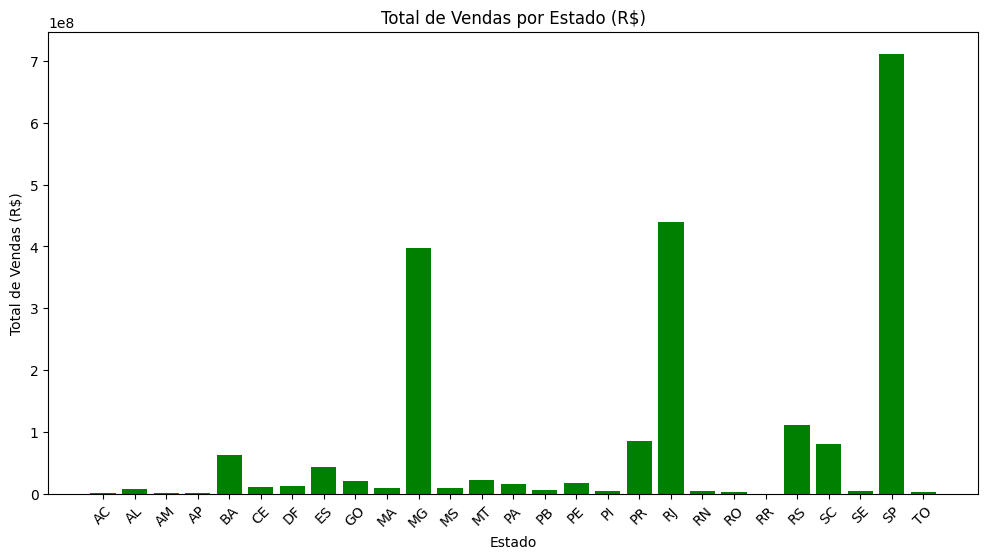

In [7]:
import matplotlib.pyplot as plt

# Converter o resultado para um DataFrame para facilitar a visualização
sales_by_state_df = sales_by_state.reset_index()

# Gráfico de barras para o total de vendas por estado
plt.figure(figsize=(12, 6))
plt.bar(sales_by_state_df['geolocation_state'], sales_by_state_df['price'], color='green')

# Adicionar títulos e rótulos
plt.title('Total de Vendas por Estado (R$)')
plt.xlabel('Estado')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)

# Mostrar o gráfico
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_19.png', format='png')
plt.show()


In [8]:
top_5_states = sales_by_state_df.sort_values(by='price', ascending=False).head(5)
print("Top 5 estados por volume de vendas:")
print(top_5_states)


Top 5 estados por volume de vendas:
   geolocation_state         price
25                SP  7.118387e+08
18                RJ  4.401425e+08
10                MG  3.971902e+08
22                RS  1.111831e+08
17                PR  8.539247e+07


In [9]:
# Carregar o dataset de produtos com o parâmetro assume_missing
products = dd.read_csv('olist_products_dataset.csv', assume_missing=True)

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
print(products.head())



                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [10]:
# Juntar os dados de produtos com as vendas por estado
orders_items_products_geo = dd.merge(orders_items_geo, products, on='product_id')

# Agrupar as vendas por estado e por categoria de produto
sales_by_state_category = orders_items_products_geo.groupby(['geolocation_state', 'product_category_name'])['price'].sum().compute()

# Visualizar as primeiras linhas do resultado
print(sales_by_state_category.head())


geolocation_state  product_category_name
AC                 artigos_de_natal           7479.30
                   audio                        29.80
                   automotivo                63847.15
                   bebes                     40000.20
                   beleza_saude             114310.33
Name: price, dtype: float64


In [11]:
# Ordenar as vendas por estado e por categoria de produto
top_categories_by_state = sales_by_state_category.reset_index().sort_values(by=['geolocation_state', 'price'], ascending=[True, False])

# Mostrar as 5 principais categorias de produtos em cada estado
top_categories_by_state_grouped = top_categories_by_state.groupby('geolocation_state').head(5)
print(top_categories_by_state_grouped)


     geolocation_state   product_category_name      price
27                  AC      relogios_presentes  196438.40
21                  AC        moveis_decoracao  130895.78
29                  AC               telefonia  128502.16
16                  AC  informatica_acessorios  120600.92
4                   AC            beleza_saude  114310.33
...                ...                     ...        ...
1336                TO            beleza_saude  377924.32
1367                TO      relogios_presentes  364592.62
1347                TO           esporte_lazer  336830.48
1335                TO                   bebes  242828.95
1334                TO              automotivo  201214.69

[135 rows x 3 columns]


<Figure size 1400x800 with 0 Axes>

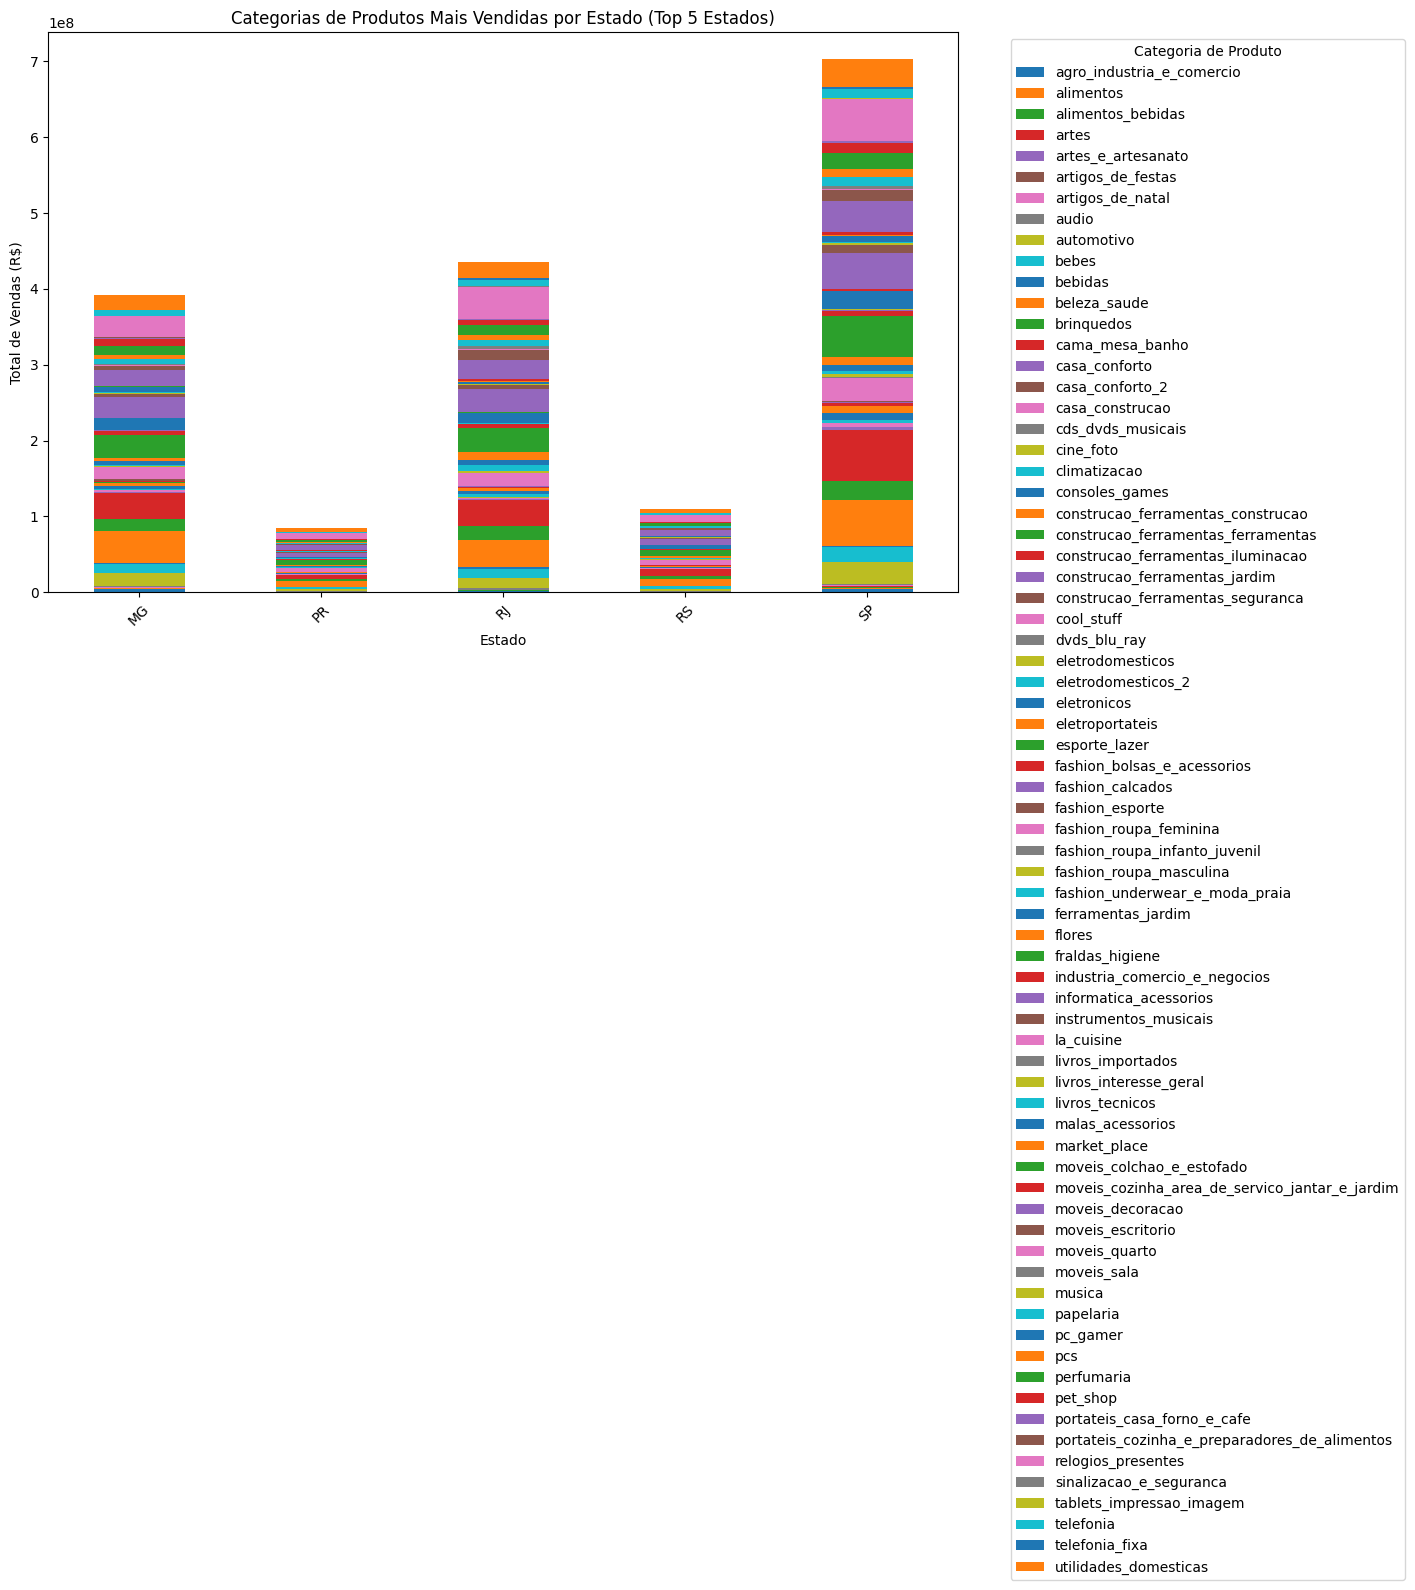

In [12]:
import matplotlib.pyplot as plt

# Selecionar os top 5 estados com mais vendas para visualização
top_5_states = sales_by_state_category.reset_index().groupby('geolocation_state')['price'].sum().sort_values(ascending=False).head(5).index

# Filtrar os dados para os top 5 estados
filtered_data = sales_by_state_category.loc[sales_by_state_category.index.get_level_values('geolocation_state').isin(top_5_states)].reset_index()

# Pivotar os dados para obter um formato adequado para o gráfico de barras empilhadas
pivot_data = filtered_data.pivot_table(values='price', index='geolocation_state', columns='product_category_name', aggfunc='sum', fill_value=0)

# Criar gráfico de barras empilhadas
plt.figure(figsize=(14, 8))  # Aumentar o tamanho do gráfico
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))

# Ajustar rótulos e título
plt.title('Categorias de Produtos Mais Vendidas por Estado (Top 5 Estados)')
plt.xlabel('Estado')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Produto', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover a legenda para fora

# Aplicar layout ajustado manualmente
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.75, top=0.9)  # Ajuste manual dos limites

# Mostrar o gráfico
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_24.png', format='png')
plt.show()


C:\Users\pammy\AppData\Local\Temp\ipykernel_9164\2441780927.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_state = filtered_data.groupby('geolocation_state', group_keys=False).apply(lambda x: x.nlargest(10, 'price'))


<Figure size 1400x800 with 0 Axes>

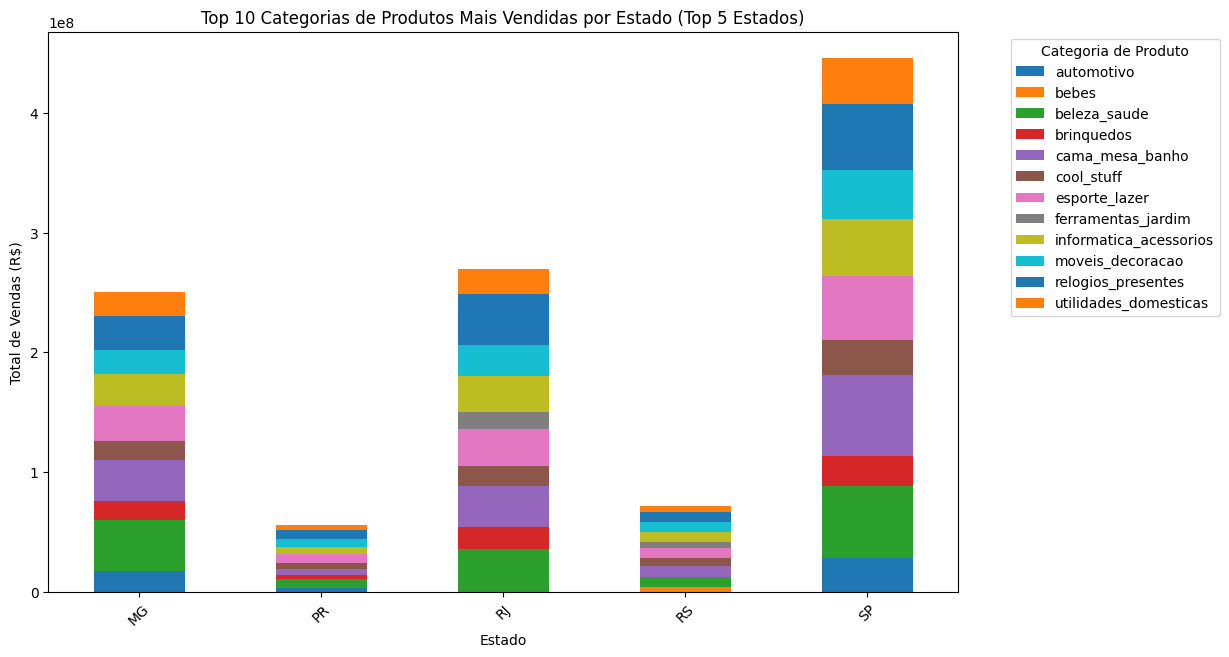

In [13]:
# Selecionar os top 5 estados com mais vendas
top_5_states = sales_by_state_category.reset_index().groupby('geolocation_state')['price'].sum().sort_values(ascending=False).head(5).index

# Filtrar os dados para os top 5 estados
filtered_data = sales_by_state_category.loc[sales_by_state_category.index.get_level_values('geolocation_state').isin(top_5_states)].reset_index()

# Ordenar e selecionar as top 10 categorias de produtos por estado
top_categories_by_state = filtered_data.groupby('geolocation_state', group_keys=False).apply(lambda x: x.nlargest(10, 'price'))

# Pivotar os dados para obter um formato adequado para o gráfico de barras empilhadas
pivot_data = top_categories_by_state.pivot_table(values='price', index='geolocation_state', columns='product_category_name', aggfunc='sum', fill_value=0)

# Criar gráfico de barras empilhadas
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))

# Ajustar rótulos e título
plt.title('Top 10 Categorias de Produtos Mais Vendidas por Estado (Top 5 Estados)')
plt.xlabel('Estado')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Aplicar layout ajustado manualmente
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.75, top=0.9)

# Mostrar o gráfico
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_25.png', format='png')
plt.show()



In [14]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Carregar os dados de pedidos, caso ainda não tenham sido carregados
orders = dd.read_csv('olist_orders_dataset.csv', assume_missing=True)

# Converter a coluna de timestamp para o formato de data
orders['order_purchase_timestamp'] = dd.to_datetime(orders['order_purchase_timestamp'])

# Unir os dados de pedidos com os itens de pedidos para obter o preço total
orders_items_geo = dd.merge(order_items, orders, on='order_id')

# Agrupar as vendas por mês
orders_items_geo['order_month'] = orders_items_geo['order_purchase_timestamp'].dt.to_period('M')
sales_by_month = orders_items_geo.groupby('order_month')['price'].sum().compute()

# Exibir as primeiras linhas do resultado
print(sales_by_month.head())


order_month
2016-09       267.36
2016-10     49507.66
2016-12        10.90
2017-01    120312.87
2017-02    247303.02
Freq: M, Name: price, dtype: float64


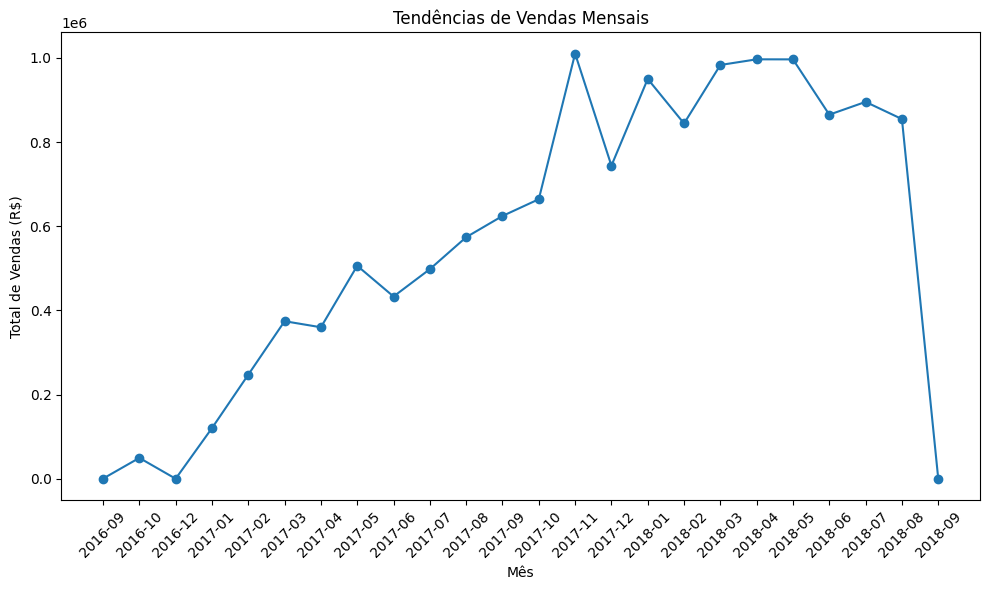

In [15]:
# Gráfico de linha para as vendas por mês
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker='o')

# Ajustar títulos e rótulos
plt.title('Tendências de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_27.png', format='png')
plt.show()


C:\Users\pammy\AppData\Local\Temp\ipykernel_9164\1244590681.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(sales_by_month_df['ds'].iloc[-1], periods=12, freq='M')


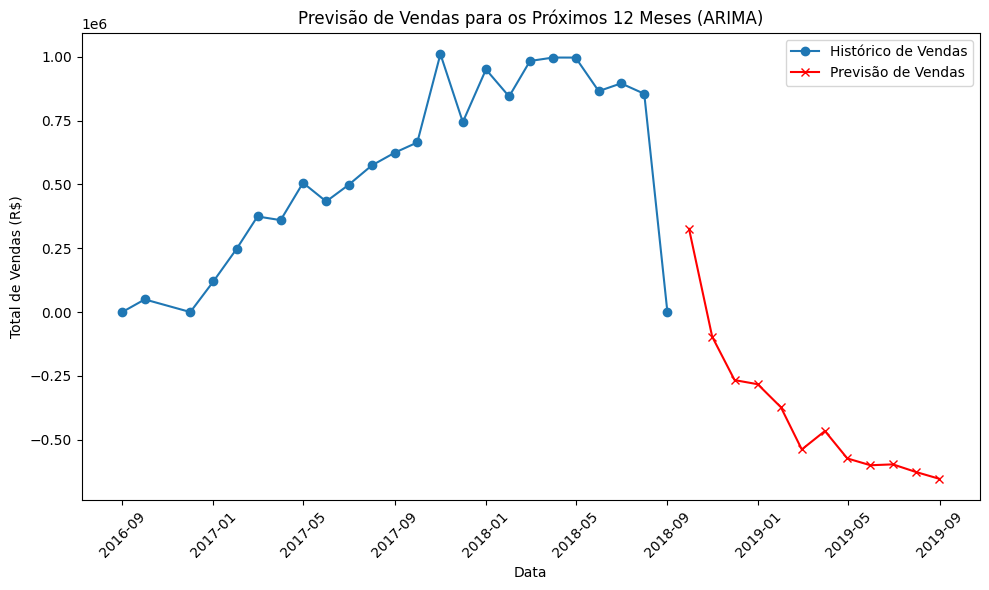

24    325755.378490
25    -96501.933805
26   -266445.378146
27   -282636.486476
28   -372604.723691
29   -538027.736193
30   -465811.307062
31   -573211.963492
32   -599910.944315
33   -596451.530000
34   -626393.671994
35   -652780.416784
Name: predicted_mean, dtype: float64


In [16]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Preparar os dados para ARIMA
sales_by_month_df = pd.DataFrame(sales_by_month).reset_index()
sales_by_month_df.columns = ['ds', 'y']

# Converter a coluna ds para datetime
sales_by_month_df['ds'] = sales_by_month_df['ds'].dt.to_timestamp()

# Ajustar o modelo ARIMA (ordem (p, d, q))
model = ARIMA(sales_by_month_df['y'], order=(5, 1, 0))
model_fit = model.fit()

# Fazer a previsão para os próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Criar o intervalo de datas para a previsão
future_dates = pd.date_range(sales_by_month_df['ds'].iloc[-1], periods=12, freq='M')

# Visualizar a previsão
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month_df['ds'], sales_by_month_df['y'], label='Histórico de Vendas', marker='o')
plt.plot(future_dates, forecast, label='Previsão de Vendas', color='red', marker='x')
plt.title('Previsão de Vendas para os Próximos 12 Meses (ARIMA)')
plt.xlabel('Data')
plt.ylabel('Total de Vendas (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_28.png', format='png')
plt.show()

# Exibir a tabela de previsões
print(forecast)



In [17]:
# Carregar os dados de pagamentos (caso ainda não tenha sido carregado)
order_payments = dd.read_csv('olist_order_payments_dataset.csv', assume_missing=True)

# Unir os dados de pagamentos com os itens de pedidos
orders_items_payments = dd.merge(order_items, order_payments, on='order_id')

# Exibir uma amostra dos dados
print(orders_items_payments.head())


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-09-19 09:45:35   58.90          13.29                 1.0   
1  2017-05-03 11:05:13  239.90          19.93                 1.0   
2  2018-01-18 14:48:30  199.0

payment_type
boleto         22867
credit_card    86769
debit_card      1691
voucher         6274
Name: count, dtype: int64


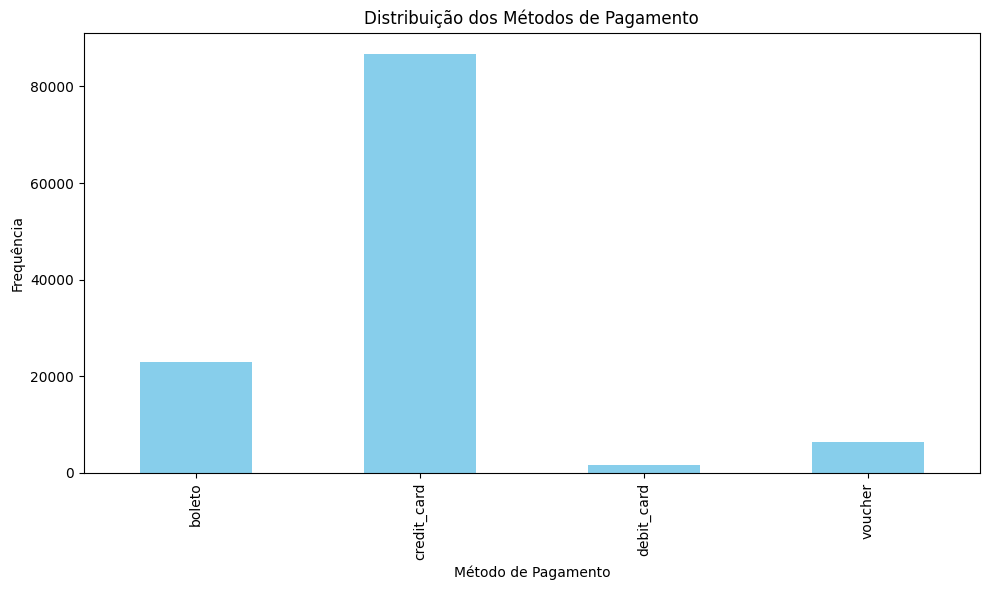

In [18]:
# Contagem dos métodos de pagamento
payment_distribution = orders_items_payments['payment_type'].value_counts().compute()

# Exibir a distribuição dos métodos de pagamento
print(payment_distribution)

# Visualizar a distribuição em um gráfico de barras
payment_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Títulos e rótulos
plt.title('Distribuição dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_30.png', format='png')
plt.show()


payment_type
boleto         104.584146
credit_card    126.477858
debit_card     108.668681
voucher        105.112152
Name: price, dtype: float64


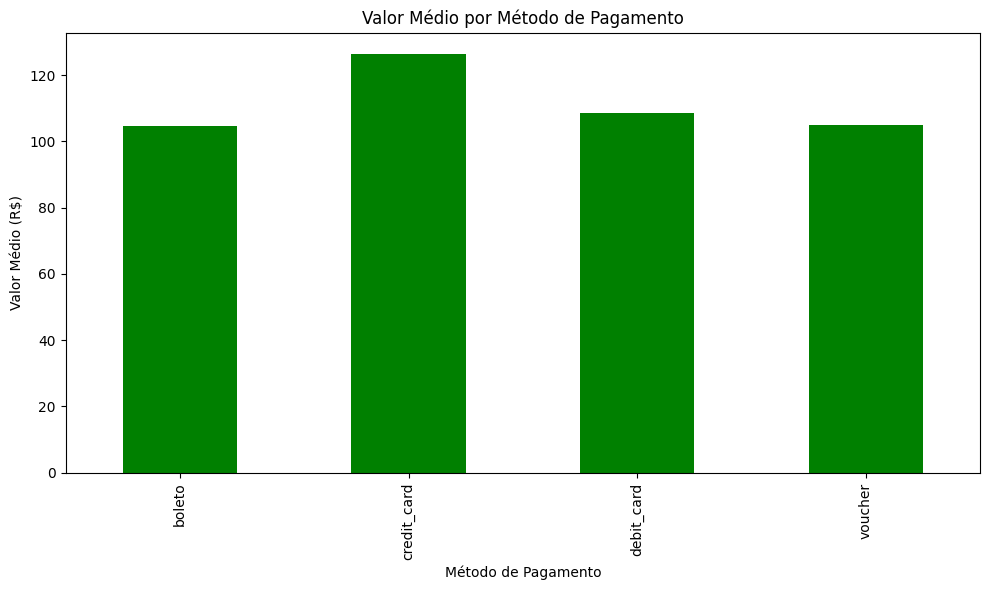

In [19]:
# Agrupar por método de pagamento e calcular o valor médio das vendas
average_payment_value = orders_items_payments.groupby('payment_type')['price'].mean().compute()

# Exibir o valor médio por método de pagamento
print(average_payment_value)

# Visualizar o valor médio por método de pagamento em um gráfico de barras
average_payment_value.plot(kind='bar', figsize=(10, 6), color='green')

# Títulos e rótulos
plt.title('Valor Médio por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Valor Médio (R$)')

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_31.png', format='png')
plt.show()


payment_installments
0.0      43.093333
1.0      91.144611
2.0      97.803021
3.0     108.299014
4.0     126.005182
5.0     139.312704
6.0     156.332480
7.0     145.151045
8.0     237.499998
9.0     151.219174
10.0    292.106682
11.0     86.366000
12.0    226.895337
13.0    110.271667
14.0    142.880625
15.0    327.182935
16.0    185.542857
17.0    149.745714
18.0    323.891316
20.0    454.431429
21.0    110.960000
22.0    209.990000
23.0    216.000000
24.0    293.281176
Name: price, dtype: float64


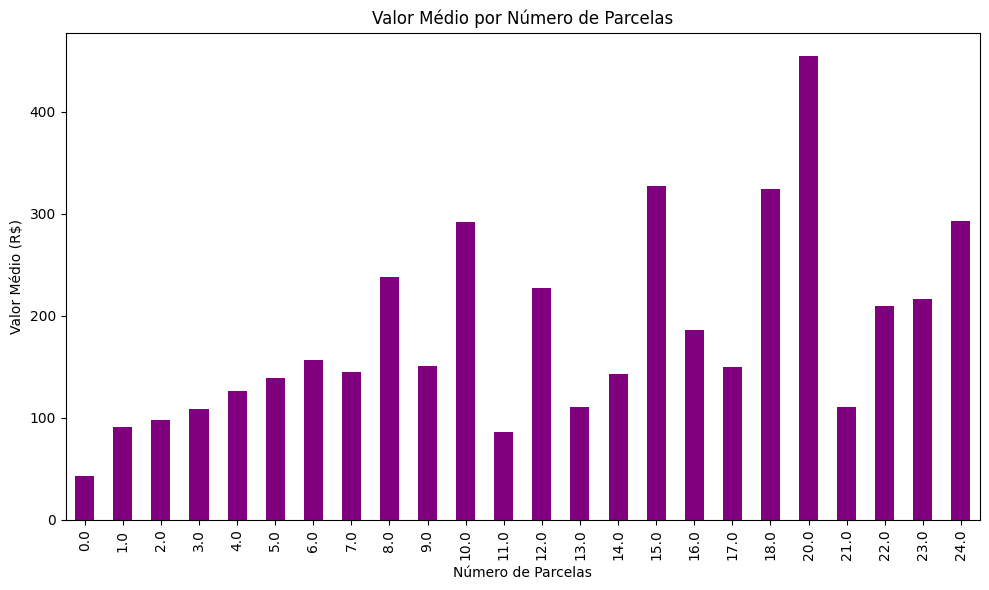

In [20]:
# Analisar o valor médio das transações por número de parcelas
payment_installments_analysis = orders_items_payments.groupby('payment_installments')['price'].mean().compute()

# Exibir a análise
print(payment_installments_analysis)

# Visualizar a análise em um gráfico
payment_installments_analysis.plot(kind='bar', figsize=(10, 6), color='purple')

# Títulos e rótulos
plt.title('Valor Médio por Número de Parcelas')
plt.xlabel('Número de Parcelas')
plt.ylabel('Valor Médio (R$)')
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_32.png', format='png')
plt.show()


In [21]:
# Carregar os dados de reviews (avaliações)
order_reviews = dd.read_csv('olist_order_reviews_dataset.csv', assume_missing=True)

# Exibir as primeiras linhas para entender a estrutura
print(order_reviews.head())


                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0           4.0                  NaN   
1           5.0                  NaN   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

review_score
1.0    11424
2.0     3151
3.0     8179
4.0    19142
5.0    57328
Name: count, dtype: int64


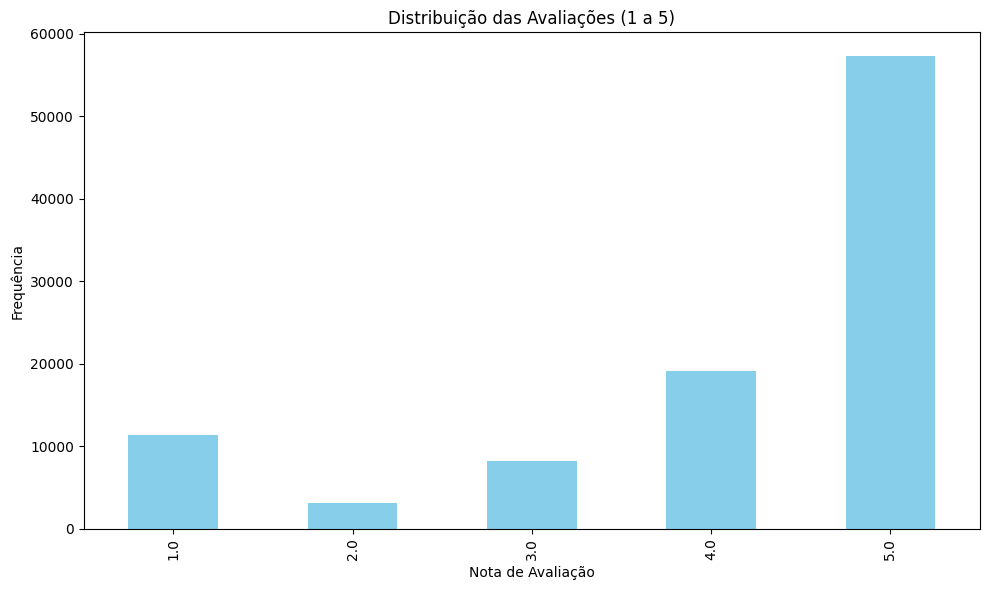

In [22]:
# Verificar a distribuição das avaliações (nota de 1 a 5)
review_distribution = order_reviews['review_score'].value_counts().compute()

# Exibir a distribuição das avaliações
print(review_distribution)

# Visualizar a distribuição em um gráfico de barras
review_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Títulos e rótulos
plt.title('Distribuição das Avaliações (1 a 5)')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_34.png', format='png')
plt.show()


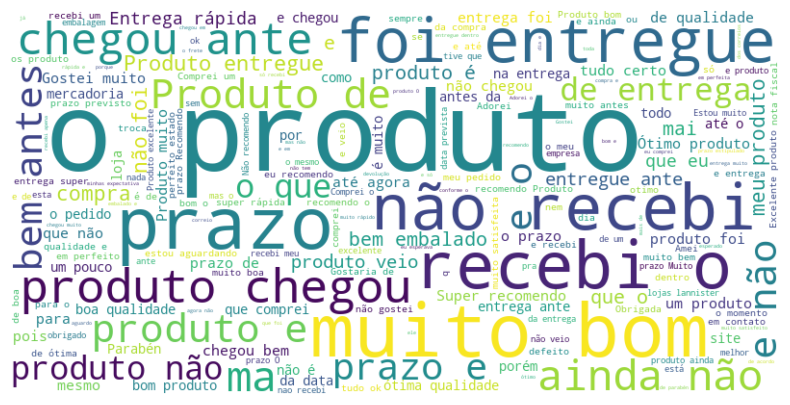

In [23]:
from wordcloud import WordCloud

# Combinar todos os comentários em um único texto (filtrando os nulos)
comments = order_reviews['review_comment_message'].dropna().compute()

# Gerar uma única string com todos os comentários
all_comments = ' '.join(comments)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Visualizar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desligar os eixos para focar na nuvem de palavras
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_35.png', format='png')
plt.show()


geolocation_state
AC     4.033949
AL     3.728064
AM     4.092195
AP     4.183107
BA     3.848503
CE     3.865141
DF     4.082291
ES     4.050175
GO     4.012771
MA     3.724982
MG     4.120325
MS     4.065043
MT     4.150529
PA     3.897086
PB     4.065523
PE     4.035119
PI     3.932682
PR     4.185349
RJ     3.923856
RN     4.094650
RO     4.013116
RR     3.566363
RS     4.163564
SC     4.040326
SE     3.838013
SP     4.187001
TO     4.004558
NaN    4.103943
Name: review_score, dtype: float64


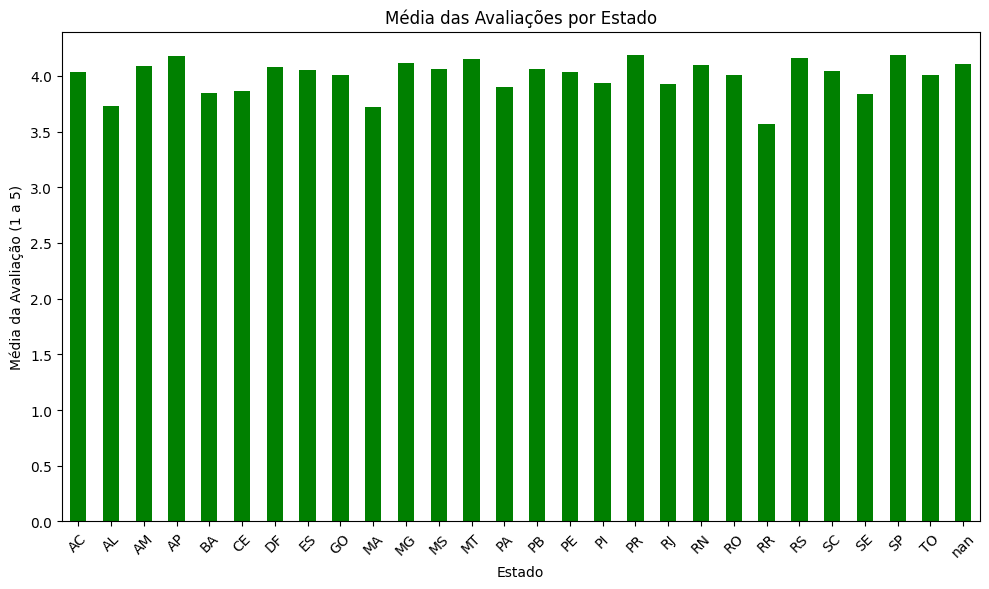

In [24]:
# Carregar os dados de pedidos (orders)
orders = dd.read_csv('olist_orders_dataset.csv', assume_missing=True)

# Unir os dados de reviews com os pedidos usando 'order_id'
reviews_orders = dd.merge(order_reviews, orders, on='order_id')

# Agora unir com os dados de localização dos clientes usando 'customer_id'
reviews_geo = dd.merge(reviews_orders, customers_geo, on='customer_id')

# Agrupar as avaliações por estado
review_by_state = reviews_geo.groupby('geolocation_state')['review_score'].mean().compute()

# Exibir as avaliações médias por estado
print(review_by_state)

# Visualizar em um gráfico de barras
review_by_state.plot(kind='bar', figsize=(10, 6), color='green')

# Títulos e rótulos
plt.title('Média das Avaliações por Estado')
plt.xlabel('Estado')
plt.ylabel('Média da Avaliação (1 a 5)')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_36.png', format='png')
plt.show()



In [25]:
# Verificar a contagem de registros por estado para garantir que temos dados de diversos estados
state_counts = orders_geo['customer_state'].value_counts().compute()
print("Contagem de registros por estado:\n", state_counts)


Contagem de registros por estado:
 customer_state
AC       7649
AL      34862
AM       5587
AP       4912
BA     365884
CE      63511
DF      93475
ES     316660
GO     133160
MA      53387
MG    2878739
MS      61484
MT     122402
PA      83557
PB      27716
PE     114592
PI      23916
PR     626046
RJ    3015722
RN      20597
RO      21241
RR       2087
RS     805363
SC     538624
SE      24585
SP    5620465
TO      17510
Name: count, dtype: int64


In [26]:
# Exibir uma amostra dos tempos de entrega para diferentes estados, usando 'frac' em vez de 'n'
# Aqui, 'frac=0.01' significa que estamos amostrando 1% dos dados
sample_delivery_times = orders_geo[['customer_state', 'delivery_time_days']].dropna().sample(frac=0.01).compute()

print("Amostra dos tempos de entrega para diferentes estados:\n", sample_delivery_times)


KeyError: "['delivery_time_days'] not in index"

customer_state
AC    20.574482
AL    23.143260
AM    24.651197
AP    27.991226
BA    18.232234
CE    21.089548
DF    12.496808
ES    14.893266
GO    15.313374
MA    20.738620
MG    11.418663
MS    15.366491
MT    17.347747
PA    22.550078
PB    19.486398
PE    17.271925
PI    18.145633
PR    11.038907
RJ    14.519525
RN    18.491999
RO    18.654153
RR    24.520601
RS    14.538258
SC    14.494434
SE    21.467370
SP     8.470522
TO    16.300416
Name: delivery_time_days, dtype: float64


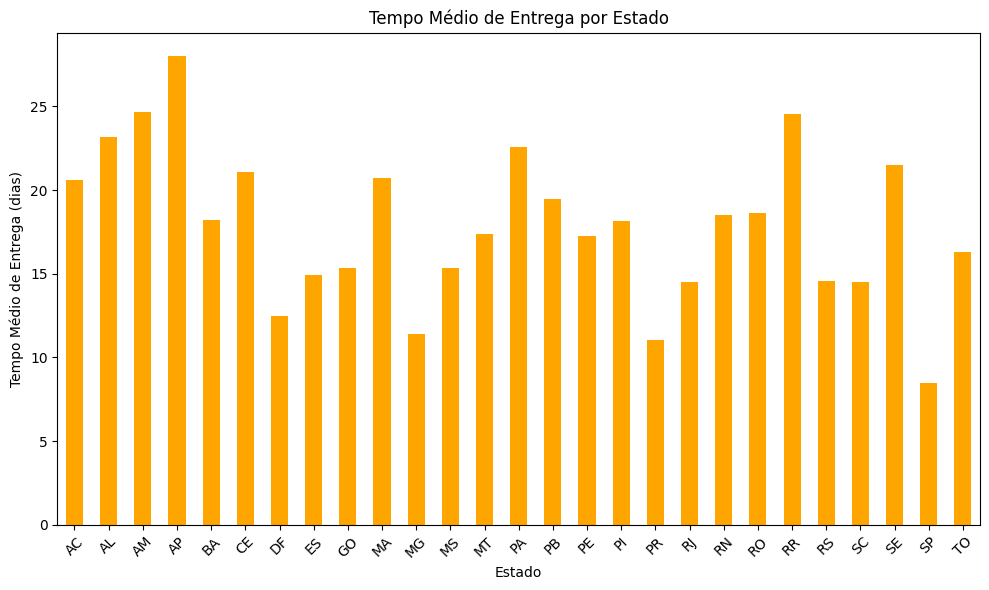

In [55]:
# Agrupar por estado e calcular o tempo médio de entrega
delivery_time_by_state = orders_geo.groupby('customer_state')['delivery_time_days'].mean().compute()

# Exibir os tempos médios de entrega por estado
print(delivery_time_by_state)

# Visualizar os resultados em um gráfico de barras
delivery_time_by_state.plot(kind='bar', figsize=(10, 6), color='orange')

# Títulos e rótulos
plt.title('Tempo Médio de Entrega por Estado')
plt.xlabel('Estado')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_55.png', format='png')
plt.show()


In [57]:
# Unir os dados de reviews com os dados de pedidos e localização
reviews_orders_geo = dd.merge(order_reviews, orders_geo, on='order_id')

# Remover valores ausentes antes de calcular a correlação
reviews_orders_geo_clean = reviews_orders_geo[['delivery_time_days', 'review_score']].dropna()

# Calcular a correlação entre o tempo de entrega e a nota de avaliação
correlation = reviews_orders_geo_clean.corr().compute()

# Exibir a correlação
print("Correlação entre tempo de entrega e avaliação do cliente:\n", correlation)


c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Correlação entre tempo de entrega e avaliação do cliente:
                     delivery_time_days  review_score
delivery_time_days            1.000000     -0.355258
review_score                 -0.355258      1.000000


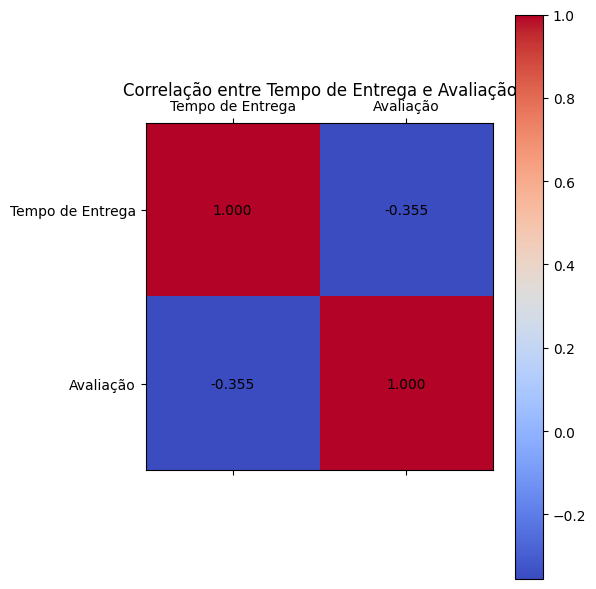

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de correlação (obtidos do cálculo anterior)
labels = ['Tempo de Entrega', 'Avaliação']
correlation_matrix = np.array([[1.000, -0.355], [-0.355, 1.000]])

# Criar o gráfico de correlação
fig, ax = plt.subplots(figsize=(6, 6))

# Exibir a matriz de correlação como mapa de calor
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Adicionar os valores da correlação sobre as células do gráfico
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.3f}', ha='center', va='center')

# Adicionar rótulos
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)
ax.set_yticks([0, 1])
ax.set_yticklabels(labels)

# Título e barra de cores
plt.title('Correlação entre Tempo de Entrega e Avaliação', pad=20)
fig.colorbar(cax)

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_58.png', format='png')
plt.show()


In [60]:
# Carregar os dados de itens de pedidos (caso ainda não tenha sido carregado)
order_items = dd.read_csv('olist_order_items_dataset.csv', assume_missing=True)

# Unir os dados de reviews, pedidos e itens de pedidos
reviews_orders_items = dd.merge(reviews_orders_geo, order_items, on='order_id')

# Agora unir com os dados de produtos
reviews_orders_products = dd.merge(reviews_orders_items, products, on='product_id')

# Remover valores ausentes antes de calcular a correlação por categoria
reviews_orders_products_clean = reviews_orders_products[['product_category_name', 'delivery_time_days', 'review_score']].dropna()

# Exibir uma amostra para garantir que os dados estão corretos
print(reviews_orders_products_clean.head())


  product_category_name  delivery_time_days  review_score
0         esporte_lazer                 6.0           4.0
1         esporte_lazer                 6.0           4.0
2         esporte_lazer                 6.0           4.0
3         esporte_lazer                 6.0           4.0
4         esporte_lazer                 6.0           4.0


In [61]:
# Função para calcular a correlação para cada categoria de produto
def calculate_corr_by_category(df):
    return df[['delivery_time_days', 'review_score']].corr().iloc[0, 1]

# Aplicar a função para cada categoria de produto
correlation_by_category = reviews_orders_products_clean.groupby('product_category_name').apply(calculate_corr_by_category).compute()

# Exibir as correlações
print("Correlação entre tempo de entrega e avaliação por categoria de produto:\n", correlation_by_category)


C:\Users\pammy\AppData\Local\Temp\ipykernel_5040\459000473.py:6: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  correlation_by_category = reviews_orders_products_clean.groupby('product_category_name').apply(calculate_corr_by_category).compute()


Correlação entre tempo de entrega e avaliação por categoria de produto:
 product_category_name
agro_industria_e_comercio   -0.275680
alimentos                   -0.440105
alimentos_bebidas           -0.388132
artes                       -0.182304
artes_e_artesanato          -0.407853
                               ...   
sinalizacao_e_seguranca     -0.276097
tablets_impressao_imagem    -0.182244
telefonia                   -0.295039
telefonia_fixa              -0.301832
utilidades_domesticas       -0.247857
Length: 73, dtype: float64


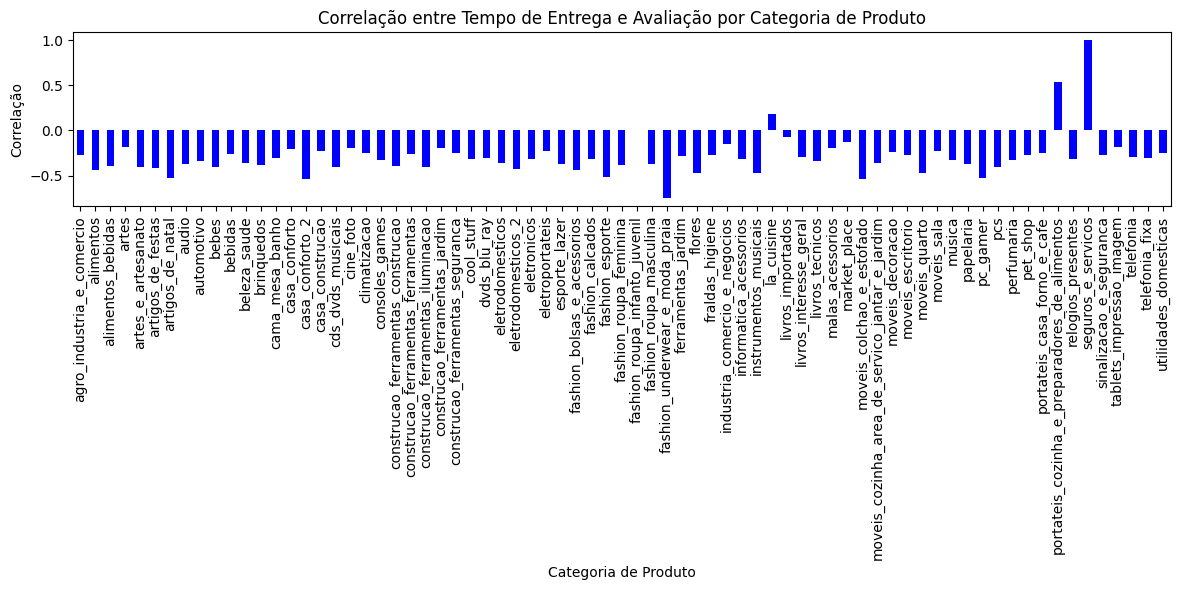

In [62]:
# Exibir a correlação em um gráfico de barras
correlation_by_category.plot(kind='bar', figsize=(12, 6), color='blue')

# Títulos e rótulos
plt.title('Correlação entre Tempo de Entrega e Avaliação por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Correlação')
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_62.png', format='png')
plt.show()

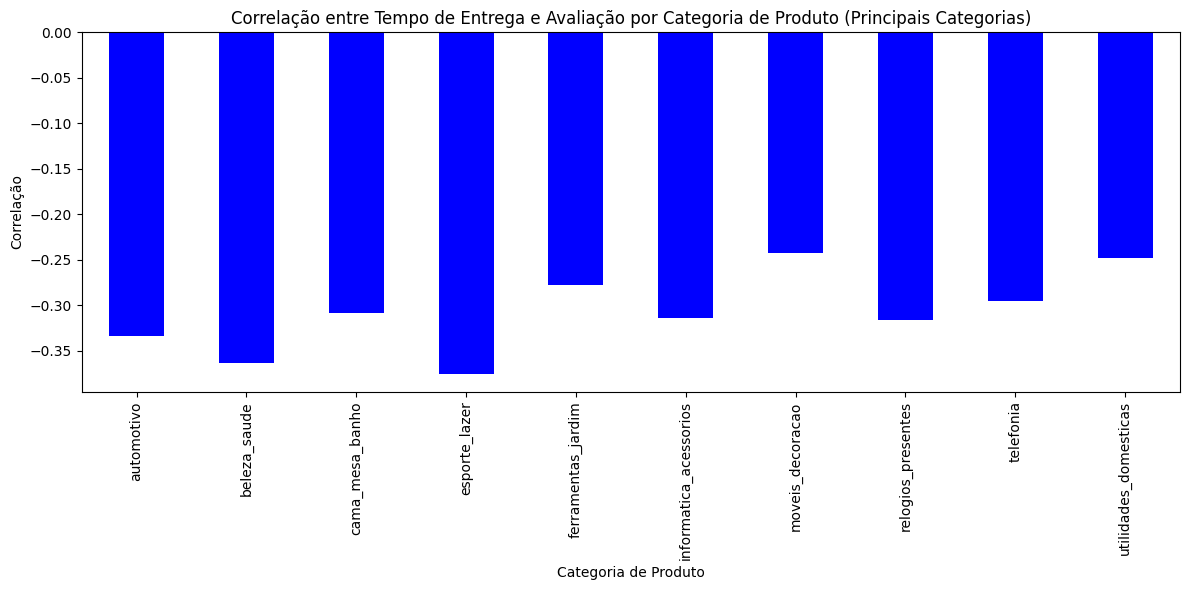

In [92]:
# Filtrar as categorias de interesse
top_categories = [
    'cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao', 
    'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes', 
    'telefonia', 'ferramentas_jardim', 'automotivo'
]

# Filtrar as categorias selecionadas
correlation_by_category_filtered = correlation_by_category[correlation_by_category.index.isin(top_categories)]

# Exibir a correlação em um gráfico de barras para as categorias selecionadas
correlation_by_category_filtered.plot(kind='bar', figsize=(12, 6), color='blue')

# Títulos e rótulos
plt.title('Correlação entre Tempo de Entrega e Avaliação por Categoria de Produto (Principais Categorias)')
plt.xlabel('Categoria de Produto')
plt.ylabel('Correlação')
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_92.png', format='png')
plt.show()

In [94]:
# Recalcular o tempo de entrega em dias, certificando-se de que as colunas de data estão no formato correto
orders_geo['order_purchase_timestamp'] = dd.to_datetime(orders_geo['order_purchase_timestamp'])
orders_geo['order_delivered_customer_date'] = dd.to_datetime(orders_geo['order_delivered_customer_date'])

# Calcular o tempo de entrega (em dias)
orders_geo['delivery_time_days'] = (orders_geo['order_delivered_customer_date'] - orders_geo['order_purchase_timestamp']).dt.days

# Verificar se o tempo de entrega está presente
print(orders_geo[['delivery_time_days']].head())



   delivery_time_days
0                   8
1                   8
2                   8
3                   8
4                   8


In [5]:
import dask.dataframe as dd

# Carregar os dados de pedidos e clientes geográficos novamente
orders = dd.read_csv('olist_orders_dataset.csv', assume_missing=True)
customers_geo = dd.read_csv('olist_customers_dataset.csv', assume_missing=True)

# Unir os dados de pedidos com os dados de localização dos clientes
orders_geo = dd.merge(orders, customers_geo, on='customer_id')

# Verificar as colunas de datas para garantir que elas contêm valores diferentes
print(orders_geo[['order_purchase_timestamp', 'order_delivered_customer_date']].head(20))


   order_purchase_timestamp order_delivered_customer_date
0       2017-10-02 10:56:33           2017-10-10 21:25:13
1       2018-07-24 20:41:37           2018-08-07 15:27:45
2       2018-08-08 08:38:49           2018-08-17 18:06:29
3       2017-11-18 19:28:06           2017-12-02 00:28:42
4       2018-02-13 21:18:39           2018-02-16 18:17:02
5       2017-07-09 21:57:05           2017-07-26 10:57:55
6       2017-04-11 12:22:08                           NaN
7       2017-05-16 13:10:30           2017-05-26 12:55:51
8       2017-01-23 18:29:09           2017-02-02 14:08:10
9       2017-07-29 11:55:02           2017-08-16 17:14:30
10      2017-05-16 19:41:10           2017-05-29 11:18:31
11      2017-07-13 19:58:11           2017-07-19 14:04:48
12      2018-06-07 10:06:19           2018-06-19 12:05:52
13      2018-07-25 17:44:10           2018-07-30 15:52:25
14      2018-03-01 14:14:28           2018-03-12 23:36:26
15      2018-06-07 19:03:12           2018-06-21 15:34:32
16      2018-0

In [9]:
# Converter as colunas de timestamp para o formato de data
orders_geo['order_purchase_timestamp'] = dd.to_datetime(orders_geo['order_purchase_timestamp'], errors='coerce')
orders_geo['order_delivered_customer_date'] = dd.to_datetime(orders_geo['order_delivered_customer_date'], errors='coerce')

# Calcular o tempo de entrega (em dias), lidando com valores ausentes
orders_geo['delivery_time_days'] = (orders_geo['order_delivered_customer_date'] - orders_geo['order_purchase_timestamp']).dt.days

# Remover registros onde o tempo de entrega é NaN
orders_geo_clean = orders_geo.dropna(subset=['delivery_time_days'])

# Verificar os tempos de entrega recalculados
print(orders_geo_clean[['delivery_time_days']].head(20))


    delivery_time_days
0                  8.0
1                 13.0
2                  9.0
3                 13.0
4                  2.0
5                 16.0
7                  9.0
8                  9.0
9                 18.0
10                12.0
11                 5.0
12                12.0
13                 4.0
14                11.0
15                13.0
16                17.0
17                12.0
18                 6.0
19                13.0
20                21.0


In [39]:
# Carregar os dados de itens de pedidos
order_items = dd.read_csv('olist_order_items_dataset.csv', assume_missing=True)

# Verificar as primeiras linhas para garantir que os dados estão corretos
print(order_items.head())


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214            1.0   
1  00018f77f2f0320c557190d7a144bdd3            1.0   
2  000229ec398224ef6ca0657da4fc703e            1.0   
3  00024acbcdf0a6daa1e931b038114c75            1.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9            1.0   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

delivery_time_days
0.0      1897.10
1.0    166313.46
2.0    346050.58
3.0    458815.93
4.0    571184.69
Name: price, dtype: float64


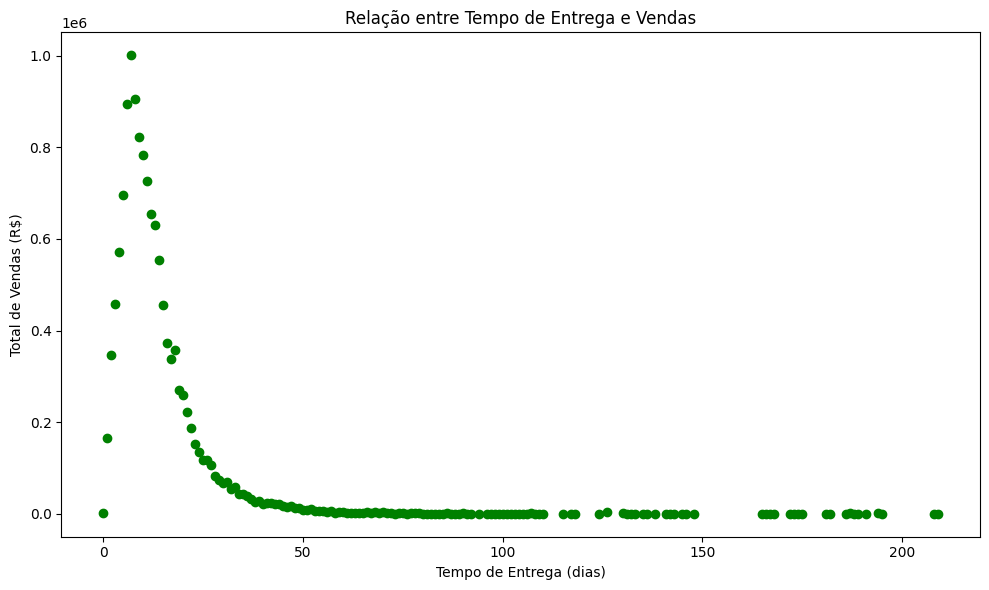

In [40]:
# Unir os dados de itens de pedidos com pedidos, usando 'order_id'
orders_items_geo = dd.merge(order_items, orders_geo_clean, on='order_id')

# Agrupar as vendas por tempo de entrega
sales_by_delivery_time = orders_items_geo.groupby('delivery_time_days')['price'].sum().compute()

# Exibir os resultados
print(sales_by_delivery_time.head())

# Visualizar a relação entre o tempo de entrega e o valor total de vendas
plt.figure(figsize=(10, 6))
plt.scatter(sales_by_delivery_time.index, sales_by_delivery_time.values, color='green')

# Adicionar títulos e rótulos
plt.title('Relação entre Tempo de Entrega e Vendas')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Total de Vendas (R$)')

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_40.png', format='png')
plt.show()



In [41]:
# Carregar o dataset de produtos, se necessário
products = dd.read_csv('olist_products_dataset.csv', assume_missing=True)

# Unir os dados de itens de pedidos, pedidos e produtos
orders_items_products_geo = dd.merge(orders_items_geo, products, on='product_id')

# Verificar as primeiras linhas após a união
print(orders_items_products_geo.head())


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214            1.0   
1  00018f77f2f0320c557190d7a144bdd3            1.0   
2  000229ec398224ef6ca0657da4fc703e            1.0   
3  00024acbcdf0a6daa1e931b038114c75            1.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9            1.0   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  \
0  2017-09-19 09:45:35   58.90          13.29   
1  2017-05-03 11:05:13  239.90          19.93   
2  2018-01-18 14:48:30  199.00          17.87   
3  2018-08-15 10:10:18   12.99          

In [42]:
# Agrupar as vendas por tempo de entrega e categoria de produto
sales_by_delivery_time_category = orders_items_products_geo.groupby(['delivery_time_days', 'product_category_name'])['price'].sum().compute()

# Exibir as primeiras linhas para garantir que os dados estão corretos
print(sales_by_delivery_time_category.head())


delivery_time_days  product_category_name
0.0                 automotivo               179.49
                    bebes                     34.99
                    brinquedos               339.99
                    cama_mesa_banho          781.94
                    cool_stuff                99.90
Name: price, dtype: float64


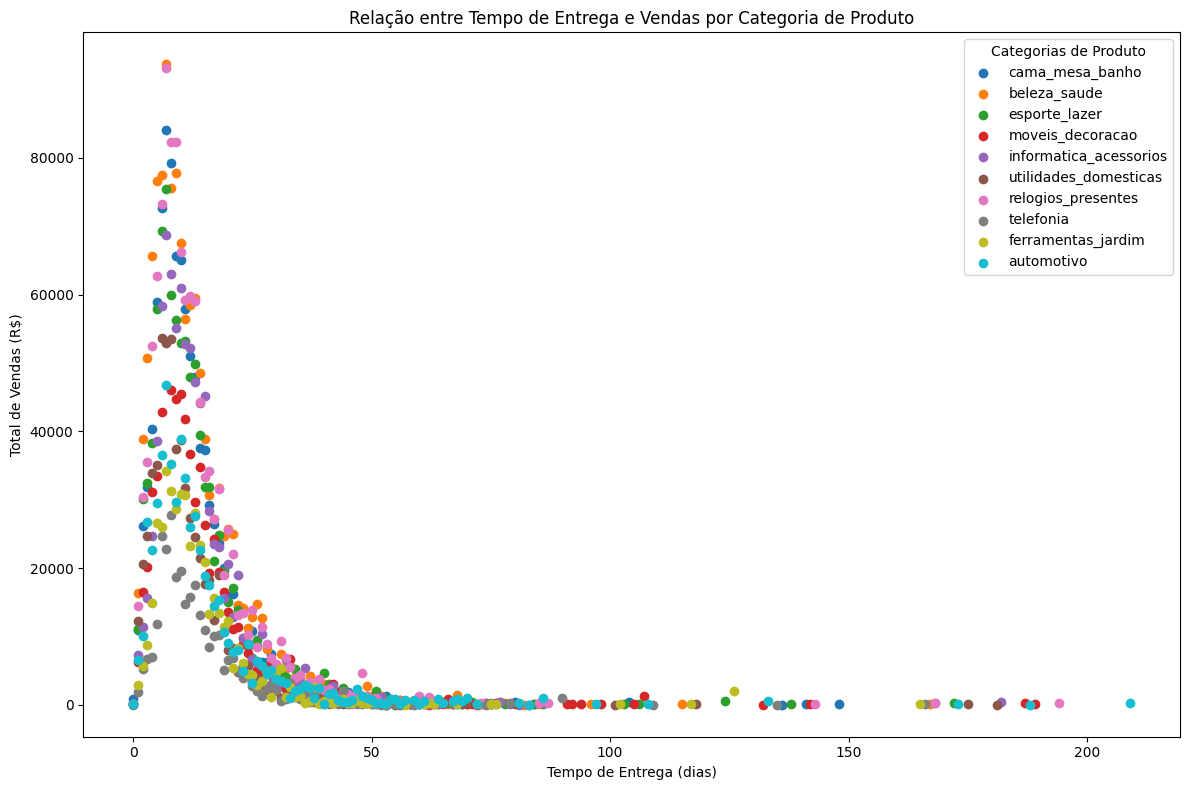

In [43]:
import matplotlib.pyplot as plt

# Selecionar as principais categorias de produtos para análise
top_categories = ['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao', 
                  'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes', 
                  'telefonia', 'ferramentas_jardim', 'automotivo']

# Filtrar os dados para as categorias selecionadas
sales_by_delivery_time_category_filtered = sales_by_delivery_time_category[sales_by_delivery_time_category.index.get_level_values('product_category_name').isin(top_categories)]

# Criar o gráfico de dispersão para cada categoria
plt.figure(figsize=(12, 8))

for category in top_categories:
    category_data = sales_by_delivery_time_category_filtered.xs(category, level='product_category_name')
    plt.scatter(category_data.index, category_data.values, label=category)

# Títulos e rótulos
plt.title('Relação entre Tempo de Entrega e Vendas por Categoria de Produto')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Total de Vendas (R$)')
plt.legend(title='Categorias de Produto')

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_43.png', format='png')
plt.show()


In [44]:
# Carregar o dataset de avaliações, se necessário
order_reviews = dd.read_csv('olist_order_reviews_dataset.csv', assume_missing=True)

# Unir os dados de avaliações com os dados de pedidos
reviews_orders_geo = dd.merge(order_reviews, orders_geo_clean, on='order_id')

# Verificar as primeiras linhas após a união
print(reviews_orders_geo.head())


                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0           4.0                  NaN   
1           5.0                  NaN   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [45]:
# Remover valores ausentes antes de calcular a correlação
reviews_orders_geo_clean = reviews_orders_geo[['delivery_time_days', 'review_score']].dropna()

# Calcular a correlação entre tempo de entrega e a nota de avaliação
correlation = reviews_orders_geo_clean.corr().compute()

# Exibir a correlação
print("Correlação entre tempo de entrega e avaliação do cliente:\n", correlation)


c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Correlação entre tempo de entrega e avaliação do cliente:
                     delivery_time_days  review_score
delivery_time_days             1.00000      -0.33366
review_score                  -0.33366       1.00000


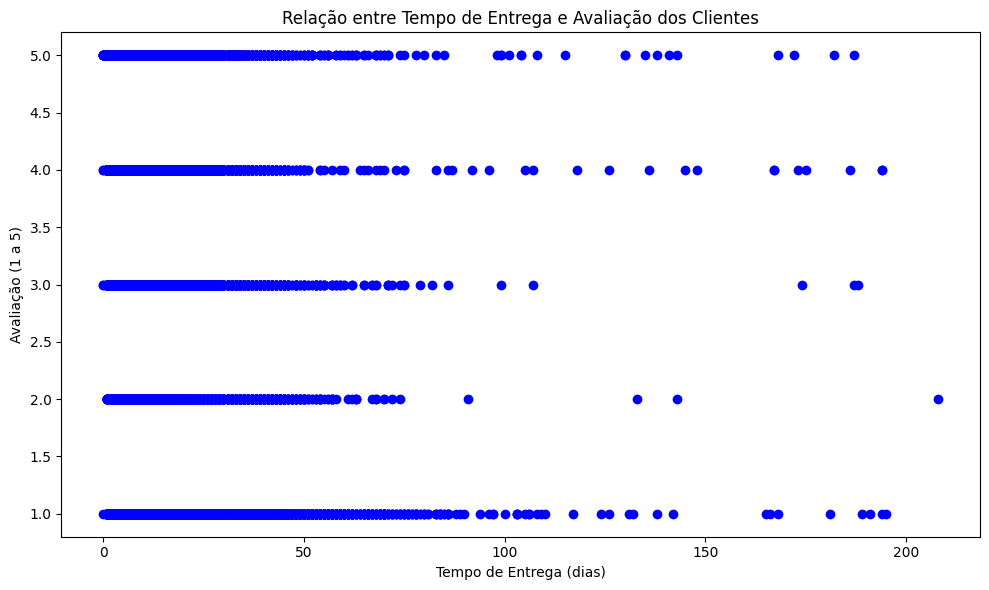

In [46]:
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão para tempo de entrega e avaliação
plt.figure(figsize=(10, 6))
plt.scatter(reviews_orders_geo_clean['delivery_time_days'].compute(), reviews_orders_geo_clean['review_score'].compute(), color='blue')

# Adicionar títulos e rótulos
plt.title('Relação entre Tempo de Entrega e Avaliação dos Clientes')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Avaliação (1 a 5)')

# Mostrar o gráfico
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_46.png', format='png')
plt.show()


In [53]:
from statsmodels.tsa.stattools import adfuller

# Executar o teste de Dickey-Fuller
result = adfuller(sales_by_month)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Se o p-valor for maior que 0.05, os dados não são estacionários
if result[1] > 0.05:
    print("Os dados não são estacionários. Aplicando a diferenciação...")

    # Aplicar a diferenciação para tornar os dados estacionários
    sales_by_month_diff = sales_by_month.diff().dropna()

    # Verificar novamente após a diferenciação
    result_diff = adfuller(sales_by_month_diff)
    print('ADF Statistic após diferenciação:', result_diff[0])
    print('p-value após diferenciação:', result_diff[1])



ADF Statistic: -0.6381789472372387
p-value: 0.8621197206737827
Os dados não são estacionários. Aplicando a diferenciação...
ADF Statistic após diferenciação: 4.4636008026355904
p-value após diferenciação: 1.0


In [54]:
# Aplicar a segunda diferenciação
sales_by_month_diff2 = sales_by_month_diff.diff().dropna()

# Verificar a estacionaridade após a segunda diferenciação
result_diff2 = adfuller(sales_by_month_diff2)
print('ADF Statistic após segunda diferenciação:', result_diff2[0])
print('p-value após segunda diferenciação:', result_diff2[1])

# Exibir os primeiros valores após a segunda diferenciação
print(sales_by_month_diff2.head())


ADF Statistic após segunda diferenciação: 2.0914475964532833
p-value após segunda diferenciação: 0.9987806095587188
order_month
2016-12    -98737.06
2017-01    169798.73
2017-02      6688.18
2017-03        51.13
2017-04   -141458.35
Freq: M, Name: price, dtype: float64


c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pammy\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\pammy\AppData\Local\Temp\ipykernel_12148\2173593164.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates_sarima = pd.date_range(sales_by_month.index[-1].to_timestamp(), periods=12, freq='M')


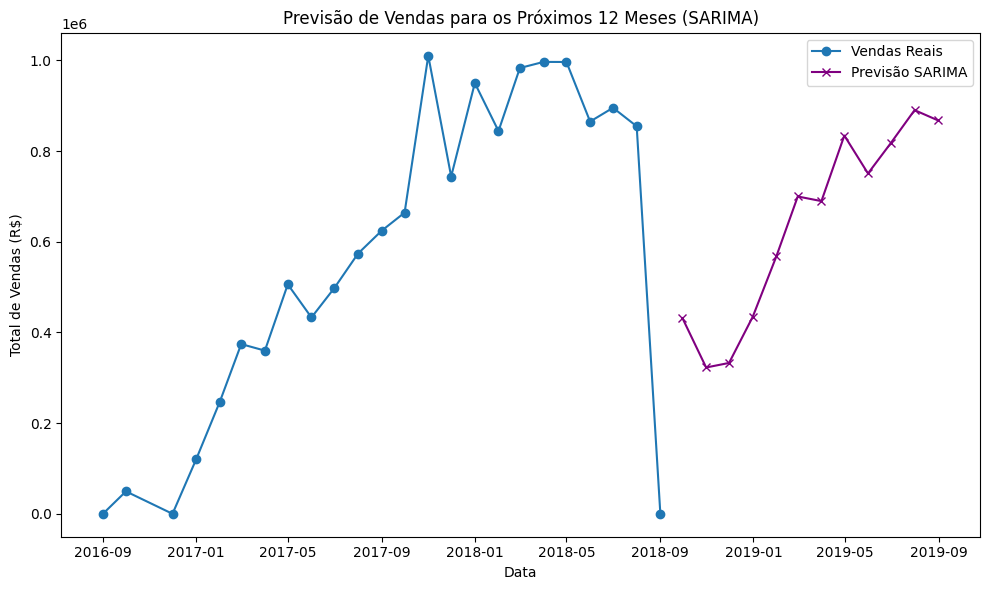

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar o modelo SARIMA com sazonalidade
model_sarima = SARIMAX(sales_by_month, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Fazer a previsão para os próximos 12 meses
forecast_sarima = model_sarima_fit.forecast(steps=12)

# Visualizar a previsão
plt.figure(figsize=(10, 6))
future_dates_sarima = pd.date_range(sales_by_month.index[-1].to_timestamp(), periods=12, freq='M')
plt.plot(sales_by_month.index.to_timestamp(), sales_by_month.values, label='Vendas Reais', marker='o')
plt.plot(future_dates_sarima, forecast_sarima, label='Previsão SARIMA', color='purple', marker='x')

plt.title('Previsão de Vendas para os Próximos 12 Meses (SARIMA)')
plt.xlabel('Data')
plt.ylabel('Total de Vendas (R$)')
plt.legend()
plt.tight_layout()
# Adicionar a etapa para salvar o gráfico em PNG
plt.savefig('grafico_57.png', format='png')
plt.show()

